In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Save your Models for later with Serialization -Chapter 13

In [ ]:
!pip install h5py

In [ ]:
#MLP for Pima indians datasets Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy as np
import pandas as pd
import os


In [ ]:
seed=7
np.random.seed(seed)

#load pima indians data set
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.head()

In [ ]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [ ]:
#create model
model=Sequential()
model.add(Dense(12,input_dim=8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

#Compile model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#fit the model
model.fit(X,y,epochs=150,batch_size=10,verbose=0)

#evaluate the model
scores=model.evaluate(X,y,verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
#serialize model to JSON
model_json=model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_json)
    
#serialize weights to HDF5

model.save_weights('model.h5')
print('save model to disk')

In [ ]:
#later

#load json and create model

json_file=open('model.json','r')

loaded_model_json=json_file.read()

json_file.close()

loaded_model=model_from_json(loaded_model_json)

#load weights into new model

loaded_model.load_weights('model.h5')
print('loaded model from disk')

#evaluate loaded model on test data

loaded_model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

score=loaded_model.evaluate(X,y,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], scores[1]*100))

# Keep The Best Model During Training With Checkpointing chapter-14

### Cahckpoint neural Network Model Improvements

In [ ]:
!pip install h5py

In [ ]:

filepath='weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5'

In [ ]:
#MLP for Pima indians datasets Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

seed=7
np.random.seed(seed)

#load pima indians data set
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

X=df.drop('Outcome',axis=1)
y=df['Outcome']


#create model
model=Sequential()
model.add(Dense(12,input_dim=8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

#Compile model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#chackpoint

filepath='weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,
                             save_best_only=True,mode='max')
callbacks_list=[checkpoint]
#fit the model
model.fit(X,y,validation_split=0.33,epochs=150,batch_size=10,
          callbacks=callbacks_list,verbose=0)

# #evaluate the model
# scores=model.evaluate(X,y,verbose=0)
# print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

### Caheckpoint best neural network model only

In [ ]:
!pip install h5py

In [ ]:
#MLP for Pima indians datasets Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

seed=7
np.random.seed(seed)

#load pima indians data set
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

X=df.drop('Outcome',axis=1)
y=df['Outcome']


#create model
model=Sequential()
model.add(Dense(12,input_dim=8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

#Compile model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#chackpoint

filepath='weights.best.hdf5'
checkpoint = ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,
                             save_best_only=True,mode='max')
callbacks_list=[checkpoint]
#fit the model
model.fit(X,y,validation_split=0.33,epochs=150,batch_size=10,
          callbacks=callbacks_list,verbose=0)

### Loading a saved Neural network Model 

In [ ]:
#MLP for Pima indians datasets Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

seed=7
np.random.seed(seed)

#load pima indians data set
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

X=df.drop('Outcome',axis=1)
y=df['Outcome']


#create model
model=Sequential()
model.add(Dense(12,input_dim=8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
# load weights
model.load_weights('weights.best.hdf5')
#Compile model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print('created model and loaded weights from file')

#estimate accuracy on whole dataset using loaded weights
scores=model.evaluate(X,y,verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Understand Model Behaviour During Traning By plotting History- Chapter-15

1. It’s speed of convergence over epochs (slope).
2. Whether the model may have already converged (plateau of the line).
3. Whether the model may be over-learning the training data (inflection for validation line)

The example collects the history, returned from training the model and creates two charts:
1. A plot of accuracy on the training and validation datasets over training epochs. 
2. A plot of loss on the training and validation datasets over training epochs.


In [1]:
#MLP for Pima indians datasets Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#fix random seed fr reproducibility
seed=7
np.random.seed(seed)

#load pima indians data set
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

X=df.drop('Outcome',axis=1)
y=df['Outcome']


#create model
model=Sequential()
model.add(Dense(12,input_dim=8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

#Compile model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#fit the model
history=model.fit(X,y,validation_split=0.33,epochs=150,batch_size=10,verbose=0)
#list all data in history 
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


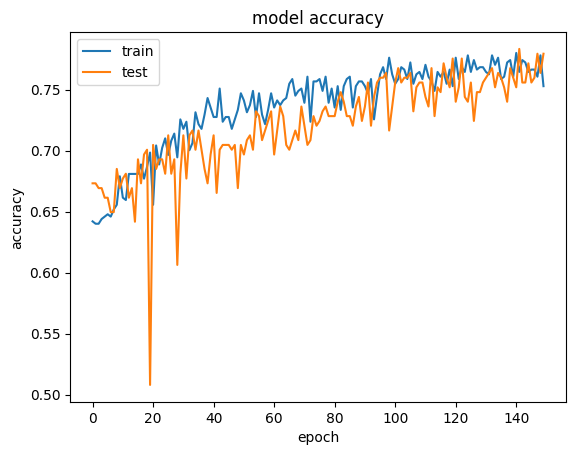

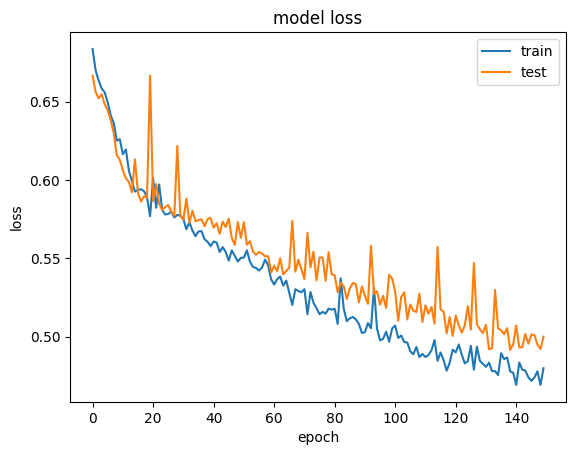

In [2]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

# Reduce overfitting with Dropout Regularization chapter-16

In [ ]:
!pip install scikeras

In [ ]:
import numpy as np
import pandas  as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load dataset
df = pd.read_csv("/kaggle/input/mines-vs-rocks/sonar.all-data.csv", header=None)
# split into input (X) and output (Y) variables
X = df.iloc[:,0:60].astype(float)
Y =df.iloc[:,60]

In [ ]:

# encode class values as integers
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(Y)

In [ ]:
# baseline
def create_baseline():
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal' , activation='relu' ))
    model.add(Dense(30, kernel_initializer='normal' , activation='relu' ))
    model.add(Dense(1, kernel_initializer='normal' , activation='sigmoid' ))
  # Compile model
    sgd = SGD(learning_rate=0.01, momentum=0.8, weight_decay=None, nesterov=False)
    model.compile(loss='binary_crossentropy' , optimizer='sgd', metrics=['accuracy' ])
    return model

In [ ]:
np.random.seed(seed)

estimators = []
estimators.append(('standardize' , StandardScaler()))
estimators.append(('mlp' , KerasClassifier(build_fn=create_baseline, epochs=300,
    batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold,error_score='raise')
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

### Using Dropout on the Visible Layer

In [ ]:
import numpy as np
import pandas  as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load dataset
df = pd.read_csv("/kaggle/input/mines-vs-rocks/sonar.all-data.csv", header=None)
# split into input (X) and output (Y) variables
X = df.iloc[:,0:60].astype(float)
Y =df.iloc[:,60]


# encode class values as integers
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(Y)


# baseline
def create_baseline():
    model = Sequential()
    model.add(Dropout(0.2,input_shape=(60,)))
    model.add(Dense(60, kernel_initializer='normal' , activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dense(30, kernel_initializer='normal' , activation='relu',kernel_constraint=MaxNorm(3)))
    model.add(Dense(1, kernel_initializer='normal' , activation='sigmoid' ))
  # Compile model
    sgd = SGD(learning_rate=0.1, momentum=0.9, weight_decay=None, nesterov=False)
    model.compile(loss='binary_crossentropy' , optimizer='sgd', metrics=['accuracy' ])
    return model

np.random.seed(seed)

estimators = []
estimators.append(('standardize' , StandardScaler()))
estimators.append(('mlp' , KerasClassifier(build_fn=create_baseline, epochs=300,
    batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold,error_score='raise')
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

### Using DropOut on Hidden Layers

In [ ]:
import numpy as np
import pandas  as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier
from keras.constraints import MaxNorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load dataset
df = pd.read_csv("/kaggle/input/mines-vs-rocks/sonar.all-data.csv", header=None)
# split into input (X) and output (Y) variables
X = df.iloc[:,0:60].astype(float)
Y =df.iloc[:,60]


# encode class values as integers
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(Y)


# baseline
def create_baseline():
    model = Sequential()
    model.add(Dense(60, input_dim=60,kernel_initializer='normal' , activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2,))
    model.add(Dense(30, kernel_initializer='normal' , activation='relu',kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2,))
    model.add(Dense(1, kernel_initializer='normal' , activation='sigmoid' ))
  # Compile model
    sgd = SGD(learning_rate=0.1, momentum=0.9, weight_decay=None, nesterov=False)
    model.compile(loss='binary_crossentropy' , optimizer='sgd', metrics=['accuracy' ])
    return model

np.random.seed(seed)

estimators = []
estimators.append(('standardize' , StandardScaler()))
estimators.append(('mlp' , KerasClassifier(build_fn=create_baseline, epochs=300,
    batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold,error_score='raise')
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Lift Performance With Leraning Rate Schedules

### Time-Based Learning Rate Schedule

### Drop-based Learning Rate Schedule